In [327]:
# Import all necessary modules for analyses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re # regular expression for extracting letters from string
%matplotlib inline

In [328]:
# Read in the csv file which is located in the same directory
data = pd.read_csv('titanic.csv')

In [329]:
# Preview the data and get an idea of how it is organized in the csv file
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Questions to be answered/analyzed:

1) Male vs. Female:
     - Does sex make a difference on survival rates?
     - Plot survival percentages of both male and female passangers.
     
2) Social status of passenger:
    - Does the passenger class play a factor with survival rates?
     
3) Age groups:
    - Does age play a factor with survival rates?
    - Seperate passengers by 10 year increments and plot survival rates.

4) Cabin:
    - How are the cabins located in the ship?
    - Does it make a difference which part of the boat your cabin was in?
    - Cabin versus survival rates

## Question 1: Male vs Female Survival Rates

In [330]:
# Evaluate total male and female population
sex_counts = data.Sex.value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

In [331]:
# Define function to parse through data frame and count survivors
def countSurvivors(sex):
    count = 0
    for i in range(len(data.Sex)):
        if data.Sex[i] == sex:
            if data.Survived[i] == 1:
                count += 1
    return count

male_survivors = countSurvivors("male")
print("Male Survivors: " + str(male_survivors))
female_survivors = countSurvivors("female")
print("Female Survivors: " + str(female_survivors))

Male Survivors: 109
Female Survivors: 233


In [332]:
# Percentage of survivors by sex
male_survivor_percentage = 109/577*100
print(male_survivor_percentage)
female_survivor_percentage = 233/314*100
print(female_survivor_percentage)

18.890814558058924
74.20382165605095


In [333]:
# Create two new data frames 
male_data = data[data["Sex"] == "male"]
female_data = data[data["Sex"] == "female"]
# preview the new data frame
male_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


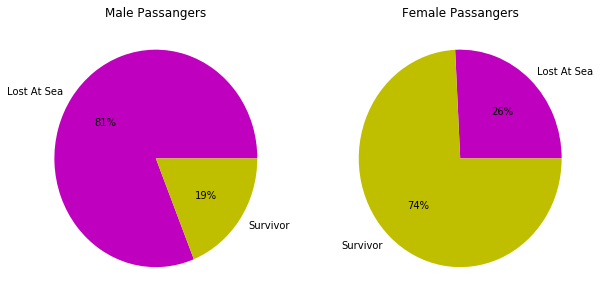

In [334]:
# Get the value counts for male and female
male_counts = male_data.Survived.value_counts()
female_counts = female_data.Survived.value_counts()

# Get values to plot in pie charts
male_freq = male_counts.values
female_freq = female_counts.values
# Reverse the numpy array for better visualization
female_freq_reverse = female_freq[::-1] 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Male Passangers")
plt.pie(male_freq, labels=["Lost At Sea", "Survivor"], colors=["m","y"], autopct="%1.0f%%")
plt.subplot(1,2,2)
plt.title("Female Passangers")
plt.pie(female_freq_reverse, labels=["Lost At Sea", "Survivor"], colors=["m","y"], autopct="%1.0f%%")
plt.show()

### Male vs. Female Passanger Results

    There is a significant increase in survival rates for female passangers. This is evidence of how well the women were looked after and the priorities of the emergency personal. Women appear to have been given more attention / assistancee than men during the emergency.

## Question 2: Social status (class) of passanger versus survival rate

In [335]:
# Social status of passangers
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

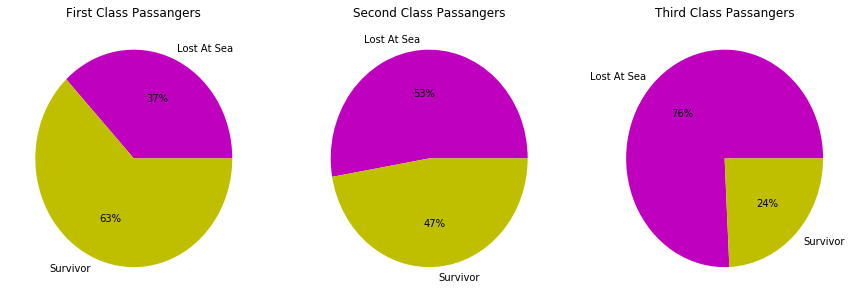

In [336]:
# Create new data frames for each class
third_class = data[data.Pclass == 3]
second_class = data[data.Pclass == 2]
first_class = data[data.Pclass == 1]

third_counts = third_class.Survived.value_counts()
# print("Third Class: " + str(third_counts))
second_counts = second_class.Survived.value_counts()
# print("Second Class: " + str(second_counts))
first_counts = first_class.Survived.value_counts()
# print("First Class: " + str(first_counts))

# Get values to plot in pie charts
third_freq = third_counts.values
second_freq = second_counts.values
first_freq = first_counts.values
# Reverse the first class values to visualize the data more consistantly
first_freq_reversed = first_freq[::-1]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("First Class Passangers")
plt.pie(first_freq_reversed, labels=["Lost At Sea", "Survivor"], colors=["m","y"], autopct="%1.0f%%")
plt.subplot(1,3,2)
plt.title("Second Class Passangers")
plt.pie(second_freq, labels=["Lost At Sea", "Survivor"], colors=["m","y"], autopct="%1.0f%%")
plt.subplot(1,3,3)
plt.title("Third Class Passangers")
plt.pie(third_freq, labels=["Lost At Sea", "Survivor"], colors=["m","y"], autopct="%1.0f%%")
plt.show()

### Social status results

    It is clear that the survival rates increase as you move up in ticket class. This could be because the passangers in the higher classes were given better help / treatment. It is also possible that the rooms for the upper classes were in better parts of the ship with better access to help and life saving equipment. 

## Question 3: Age group versus survival rates

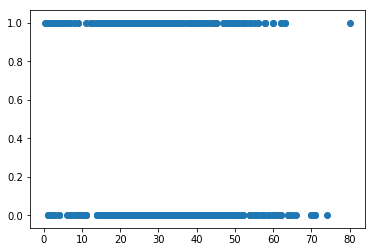

In [337]:
# Is it worth while to bin the data by age group? What does the spread currently look like?
plt.scatter(x=data.Age, y=data.Survived) #Shows what the spread looks like to give an idea if its worth bining

In [338]:
# There is no clear distribution in the preceding chart. Move forward with seperating into age groups

# Remove all NaN values and transform column into type integer
data.Age = data.Age.fillna(0)  # Does not edit in place, must re-assign. Change all "NaN" cells to 0
data.Age = data.Age.astype("int") # Change from type Float to type Int

(array([  7.,  10.,   6.,  10.,   4.,   3.,   3.,   4.,   8.,   2.,   4.,
          1.,   2.,   7.,   5.,  17.,  13.,  26.,  25.,  16.,  24.,  27.,
         16.,  31.,  23.,  18.,  18.,  27.,  20.,  27.,  17.,  20.,  15.,
         16.,  18.,  23.,   6.,  11.,  14.,  15.,   6.,  13.,   5.,   9.,
         14.,   3.,   9.,   9.,   6.,  10.,   7.,   6.,   1.,   8.,   3.,
          4.,   2.,   5.,   2.,   4.,   3.,   4.,   2.,   2.,   3.,   1.,
          0.,   0.,   0.,   3.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  1.    ,   1.9875,   2.975 ,   3.9625,   4.95  ,   5.9375,
          6.925 ,   7.9125,   8.9   ,   9.8875,  10.875 ,  11.8625,
         12.85  ,  13.8375,  14.825 ,  15.8125,  16.8   ,  17.7875,
         18.775 ,  19.7625,  20.75  ,  21.7375,  22.725 ,  23.7125,
         24.7   ,  25.6875,  26.675 ,  27.6625,  28.65  ,  29.6375,
         30.625 ,  31.6125,  32.6   ,  33.5875,  34.575 ,  35.5625,
         36.55  ,  37.5375,  38.525 ,  39.5125

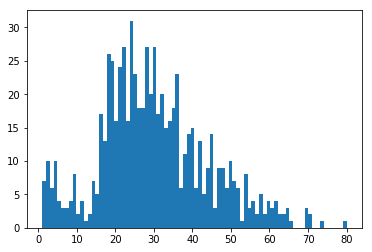

In [339]:
# Pull out all data where age is not equal to 0 which will remove all field that had a NaN
age = data[data.Age > 0].Age
plt.hist(age, bins = 80)

In [340]:
# custom bin function to group by age
def custom_bin(x):
    if x > 60:
        return "60+"
    if x > 50:
        return "50s"
    if x > 40:
        return "40s"
    if x > 30:
        return "30s"
    if x > 20:
        return "20s"
    if x > 10:
        return "teens"
    if x > 0:
        return "child"
    return "n/a"

In [341]:
#Run the custom function to bin the age groups
data["age bucket"] = data.Age.apply(custom_bin)

In [342]:
# run value counts on "age buckets"
data["age bucket"].value_counts()

20s      231
n/a      184
30s      155
teens    116
40s       84
child     57
50s       42
60+       22
Name: age bucket, dtype: int64

In [343]:
# Create a pivot table with age bins, survived, lost at sea, and survival percentage
step1 = data.pivot_table(values=['Age'],columns=['Survived'],index=['age bucket'], aggfunc='count')
# Create a new column "Survivor Percentage" by running a function across each row
step1[('Survivor Percentage')]=(step1[('Age',1)]/(step1[('Age',0)]+step1[('Age',1)]))
step1

Age     Survivor Percentage
Survived      0   1                    
age bucket                             
20s         147  84            0.363636
30s          86  69            0.445161
40s          51  33            0.392857
50s          25  17            0.404762
60+          17   5            0.227273
child        26  31            0.543860
n/a         125  59            0.320652
teens        72  44            0.379310

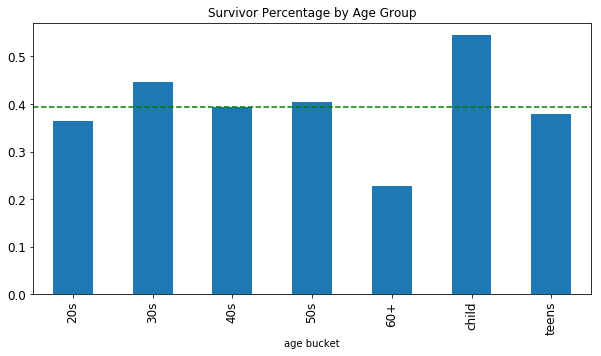

In [344]:
# Make a bar chart comparing survivor percentages by age group. Remove the "n/a" group
step1[step1.index != "n/a"]['Survivor Percentage'].plot(kind='bar', title='Survivor Percentage by Age Group', figsize=(10,5), fontsize=12)
# Add in a horizontal line for the average survival rate across all age groups
plt.axhline(y=np.mean(step1[step1.index != "n/a"]['Survivor Percentage']), color="green", linestyle="dashed")
plt.show()

### Survival chances by age group results

    It looks like children were prioritized during the emergency. This is consistent with the standard mantra of "women and children first". Our previous results showed that women were also given high priority.
    
    Senior citizens (60+)  did not do super well. They are more fragile and thus more susceptible to injury.

## Question 4: Cabin versus survival rates

In [345]:
# Investigate the cabin information
data.Cabin.head(30)
# Fill NaN values with "na"
data.Cabin = data.Cabin.fillna("na")
cabin_counts = data.Cabin.value_counts()
# cabin_counts

In [346]:
# Extract the cabin letters from the string index (remove all numbers and special characters)
# cabin_counts.index

# define a function to scrub the cabins data
def extract_cabin(cabin):
    return "".join(re.split("[^a-zA-Z]*", cabin))

# define a function to remove repeating cabins
def simplify_cabin(cabin):
    return "".join(list(set(cabin)))
        
#Run the extract_cabin and simplify_cabin functions across each row
data["Cabin Info"] = data.Cabin.apply(extract_cabin)
data["Cabin Info"] = data['Cabin Info'].apply(simplify_cabin)

c:\users\matt.berry\appdata\local\programs\python\python36\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [347]:
# Investigate new Cabin Info column
data['Cabin Info'].head(30)
data['Cabin Info'].value_counts()

na    687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
T       1
Name: Cabin Info, dtype: int64

In [348]:
# Create a pivot table with cabin information, survived, lost at sea, and survival percentage
step2 = data.pivot_table(values=['Cabin'],columns=['Survived'],index=['Cabin Info'], aggfunc='count')
step2[('Survivor Percentage')]=(step2[('Cabin',1)]/(step2[('Cabin',0)]+step2[('Cabin',1)]))
step2

Cabin        Survivor Percentage
Survived        0      1                    
Cabin Info                                  
A             8.0    7.0            0.466667
B            12.0   35.0            0.744681
C            24.0   35.0            0.593220
D             8.0   25.0            0.757576
E             8.0   24.0            0.750000
F             2.0    7.0            0.777778
FE            NaN    1.0                 NaN
FG            3.0    NaN                 NaN
G             2.0    2.0            0.500000
T             1.0    NaN                 NaN
na          481.0  206.0            0.299854

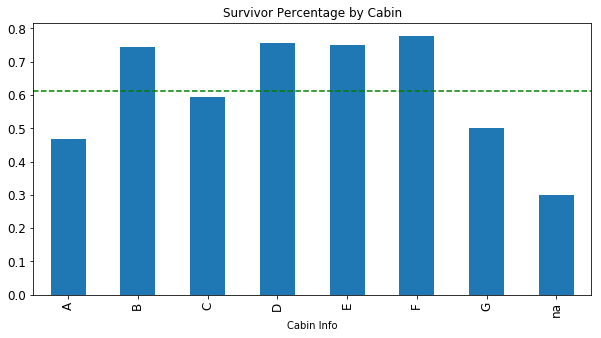

In [349]:
# Make a bar chart comparing survivor percentages by Cabin. Only show finite rows from Survivor Percentage (np.isfinite(step2['Survivor Percentage]))
step2[np.isfinite(step2['Survivor Percentage'])]['Survivor Percentage'].plot(kind='bar', title='Survivor Percentage by Cabin', figsize=(10,5), fontsize=12)
# Insert a horizontal line to show the average survival rates of each cabin class
plt.axhline(y=np.mean(step2['Survivor Percentage']), color="green", linestyle="dashed")
plt.show()

### Cabin class results:

     Refering to the website (http://www.titanicandco.com/inside.html) the cabin classes are shown below:
     A: Boat Deck
     B: Promenade Deck 
     C: Bridge Deck
     D: Shelter Deck
     E: Saloon Deck
     F: Upper Deck
     G: Middle Deck
     na: Lower Deck, Orlop Deck, and Tank Top.
     
     The chart shows a much higher survival rate for passangers who stayed in the upper parts of the ship (Promenade, Shelter, Saloon, and Upper Decks). These were most likely also high class tickets (refer back to the social class analysis). However, further analysis must be completed to evaluate any correlation. This does make sense though since the passangers in the upper parts of the ship would have more time to exit the boat and get to safety. However, if you were trapped too high (deck A) then your survival rate dropped back off. Any passangers below the main deck would have a higher likelyhood of being trapped as water filled the boat and thus would be harder to assist during the emergency. 